<a href="https://colab.research.google.com/github/Jiteshwagh/ZOMATO-DATA-ANALYSIS/blob/main/Zomato_Data_analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ZOMATO DATA ANALYSIS

#DESCRIPTION
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

In [ ]:
#Importing all the necessary packages

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reding the dataset
zomato=pd.read_csv("/content/drive/MyDrive/zomato.csv")
zomato.head() # prints the first N rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato.shape     #gives the shape of dataset

(51717, 17)

## Data Description 

<ul>
<li><b>url </b>: contains the url of the restaurant in the zomato website
<li><b>address</b>: contains the address of the restaurant in Bengaluru
<li><b>name</b>: contains the name of the restaurant
<li><b>online_order</b>: whether online ordering is available in the restaurant or not
<li><b>book_table</b>: table book option available or not
<li><b>rate</b>: contains the overall rating of the restaurant out of 5
<li><b>votes</b>: contains total number of rating for the restaurant as of the above mentioned date
<li><b>phone</b>: contains the phone number of the restaurant
<li><b>location</b>: contains the neighborhood in which the restaurant is located
<li><b>rest_type</b>: restaurant type
<li><b>dish_liked</b>: dishes people liked in the restaurant
<li><b>cuisines</b>: food styles, separated by comma
<li><b>approx_cost(for two people)</b>: contains the approximate cost for meal for two people
<li><b>reviews_list</b>: list of tuples containing reviews for the restaurant, each tuple
<li><b>menu_item contains</b>: list of menus available in the restaurant
<li><b>listed_in(type)</b>: type of meal
<li><b>listed_in(city)</b>: contains the neighborhood in which the restaurant is listed

The names of columns are a bit non descriptive and confusing so its better to rename some of these columns

In [ ]:
zomato.columns = ['Website',
             'Restaurant_Address',
             'Restaurant_Name',
             'Online_Order',
             'Book_table',
             'Rating',
             'Votes',
             'Contact',
             'Location',
             'Type_of_Restaurant',
             'Most_Liked_Dishes',
             'Cuisine',
             'Approx_Cost_FOR_2',
             'Reviews',
             'Menu',
             'Restaurant_Type_Main',
             'listed_in(city)',
             ]
zomato.head()

,Website,Restaurant_Address,Restaurant_Name,Online_Order,Book_table,Rating,Votes,Contact,Location,Type_of_Restaurant,Most_Liked_Dishes,Cuisine,Approx_Cost_FOR_2,Reviews,Menu,Restaurant_Type_Main,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato.info()      #gives the info about dataset columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Website               51717 non-null  object
 1   Restaurant_Address    51717 non-null  object
 2   Restaurant_Name       51717 non-null  object
 3   Online_Order          51717 non-null  object
 4   Book_table            51717 non-null  object
 5   Rating                43942 non-null  object
 6   Votes                 51717 non-null  int64 
 7   Contact               50509 non-null  object
 8   Location              51696 non-null  object
 9   Type_of_Restaurant    51490 non-null  object
 10  Most_Liked_Dishes     23639 non-null  object
 11  Cuisine               51672 non-null  object
 12  Approx_Cost_FOR_2     51371 non-null  object
 13  Reviews               51717 non-null  object
 14  Menu                  51717 non-null  object
 15  Restaurant_Type_Main  51717 non-null

#  DATA CLEANING

In [ ]:
#Deleting Unnnecessary Columns
zomato=zomato.drop(['Website','Most_Liked_Dishes','Contact','Menu'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

We are going to remove duplicates data when the entire rows is duplicated . 

As same name could be available for other meal types and hence other ratings and average cost (this is a chain restaurant) .

In [ ]:
zomato.duplicated().sum()       #checking the sum of duplicate entries

50

In [ ]:
zomato.drop_duplicates(inplace=True)    #dropping the duplicates

In [ ]:
zomato.shape

(51667, 13)

In [ ]:
zomato.isnull().sum()      #checking if there are aby null values

Restaurant_Address         0
Restaurant_Name            0
Online_Order               0
Book_table                 0
Rating                  7765
Votes                      0
Location                  21
Type_of_Restaurant       227
Cuisine                   45
Approx_Cost_FOR_2        345
Reviews                    0
Restaurant_Type_Main       0
listed_in(city)            0
dtype: int64

In [ ]:
zomato.dropna(inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43494 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Restaurant_Address    43494 non-null  object
 1   Restaurant_Name       43494 non-null  object
 2   Online_Order          43494 non-null  object
 3   Book_table            43494 non-null  object
 4   Rating                43494 non-null  object
 5   Votes                 43494 non-null  int64 
 6   Location              43494 non-null  object
 7   Type_of_Restaurant    43494 non-null  object
 8   Cuisine               43494 non-null  object
 9   Approx_Cost_FOR_2     43494 non-null  object
 10  Reviews               43494 non-null  object
 11  Restaurant_Type_Main  43494 non-null  object
 12  listed_in(city)       43494 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.6+ MB


As you can see the rate column is string type with an extra /5 with all the ratings. This should be cleaned. We found this column has 'NEW' ,"-" values which should replaced by np.nan.
It is important to convert the string back to float .

In [ ]:
zomato['Rating'] = zomato['Rating'].astype(str)
zomato['Rating'] = zomato['Rating'].apply(lambda x: x.split('/')[0])
zomato['Rating'] = zomato['Rating'].apply(lambda x: x.replace('NEW', str(np.nan)))
zomato['Rating'] = zomato['Rating'].apply(lambda x: x.replace('-', str(np.nan)))
zomato['Rating'] = zomato['Rating'].astype(float)

The Restaurant_Name has some giberish symbols such as (©,Â) . This should be cleaned .

In [ ]:
zomato['Restaurant_Name'] = zomato['Restaurant_Name'].astype(str)
zomato['Restaurant_Name'] = zomato['Restaurant_Name'].apply(lambda x: x.split('©')[0])
zomato['Restaurant_Name'] = zomato['Restaurant_Name'].apply(lambda x: x.split('Â')[0])

Type of the Restaurant 

In [ ]:
zomato['Type_of_Restaurant'] = zomato['Type_of_Restaurant'].str.replace(',' , '') 
zomato['Type_of_Restaurant'] = zomato['Type_of_Restaurant'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

Cleaning the Approx_Cost_FOR_2 and Cuisine coloumn replacing ( , ) .

In [ ]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.Votes = zomato.Votes.astype('int')
zomato['Approx_Cost_FOR_2'] = zomato['Approx_Cost_FOR_2'].apply(remove_comma)
zomato['Cuisine'] = zomato['Cuisine'].str.replace(',' , '') 
zomato['Cuisine'] = zomato['Cuisine'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

Cleaning the Reviews coloumn by using the substring function .

In [ ]:
zomato.Reviews= zomato.Reviews.str.slice(start=25)

Online_order & Book_table presented as strings instead of bools (working with True/False make it easier to analyze)

In [ ]:
zomato.Online_Order.replace(to_replace='Yes', value=1.0, inplace=True)
zomato.Online_Order.replace(to_replace='No', value=0.0, inplace=True)
zomato.Book_table.replace(to_replace='Yes', value=1.0, inplace=True)
zomato.Book_table.replace(to_replace='No', value=0.0, inplace=True)



In [ ]:
zomato.columns

Index(['Restaurant_Address', 'Restaurant_Name', 'Online_Order', 'Book_table',
       'Rating', 'Votes', 'Location', 'Type_of_Restaurant', 'Cuisine',
       'Approx_Cost_FOR_2', 'Reviews', 'Restaurant_Type_Main',
       'listed_in(city)'],
      dtype='object')

In [ ]:
zomato.describe()                #viewing the summary of dataset

,Online_Order,Book_table,Rating,Votes,Approx_Cost_FOR_2
count,43494.000000,43494.000000,41233.000000,43494.000000,43494.000000
mean,0.647676,0.147722,3.702044,334.464018,594.889318
std,0.477700,0.354828,0.440041,864.704471,459.393640
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.400000,17.000000,300.000000
50%,1.000000,0.000000,3.700000,64.000000,450.000000
75%,1.000000,0.000000,4.000000,255.000000,700.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [ ]:
#Some Transformations
zomato['Approx_Cost_FOR_2'] = zomato['Approx_Cost_FOR_2'].astype(str) #Changing the cost to string
zomato['Approx_Cost_FOR_2'] = zomato['Approx_Cost_FOR_2'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['Approx_Cost_FOR_2'] = zomato['Approx_Cost_FOR_2'].astype(float) # Changing the cost to Float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43494 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_Address    43494 non-null  object 
 1   Restaurant_Name       43494 non-null  object 
 2   Online_Order          43494 non-null  float64
 3   Book_table            43494 non-null  float64
 4   Rating                41233 non-null  float64
 5   Votes                 43494 non-null  int64  
 6   Location              43494 non-null  object 
 7   Type_of_Restaurant    43494 non-null  object 
 8   Cuisine               43494 non-null  object 
 9   Approx_Cost_FOR_2     43494 non-null  float64
 10  Reviews               43494 non-null  object 
 11  Restaurant_Type_Main  43494 non-null  object 
 12  listed_in(city)       43494 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 4.6+ MB


In [ ]:
zomato.isnull().sum()
zomato.dropna(inplace=True)

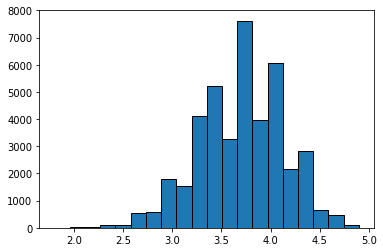

In [ ]:
plt.hist(zomato.Rating,bins=20,edgecolor='k')
plt.show()

In [ ]:
zomato['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
cat_col=zomato.select_dtypes(include='object')    #categorical column
cat_col

,Restaurant_Address,Restaurant_Name,Location,Type_of_Restaurant,Cuisine,Reviews,Restaurant_Type_Main,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Banashankari,Casual Dining,Chinese Indian Mughlai North,A beautiful place to dine in.The interiors tak...,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Banashankari,Casual Dining,Chinese Indian North Thai,Had been here for dinner with family. Turned o...,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,Ambience is not that good enough and it's not ...,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,Banashankari,Bites Quick,Indian Indian North South,Great food and proper Karnataka style full mea...,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,Basavanagudi,Casual Dining,Indian North Rajasthani,Very good restaurant in neighbourhood. Buffet ...,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,Whitefield,Bar Casual Dining,Continental Indian North,Ambience- Big and spacious lawn was used to ho...,Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,Whitefield,Bar Casual Dining,Andhra Chinese Indian Indian North South,"A fine place to chill after office hours, reas...",Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,Bar,Continental,Food and service are incomparably excellent. T...,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Bar,Finger Food,Nice and friendly place and staff is awesome. ...,Pubs and bars,Whitefield


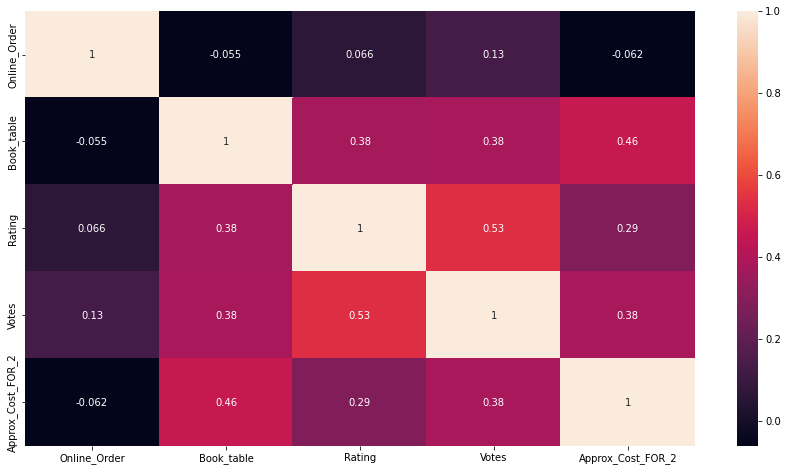

In [ ]:
#Get Correlation between different variables
corr = zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.savefig("correlation.png")
zomato.columns
plt.show()

#### The highest correlation is between name and address which is 0.62 which is not of very much concern 

# Data Visualization

#### Q1. Count Plot of Various Locations

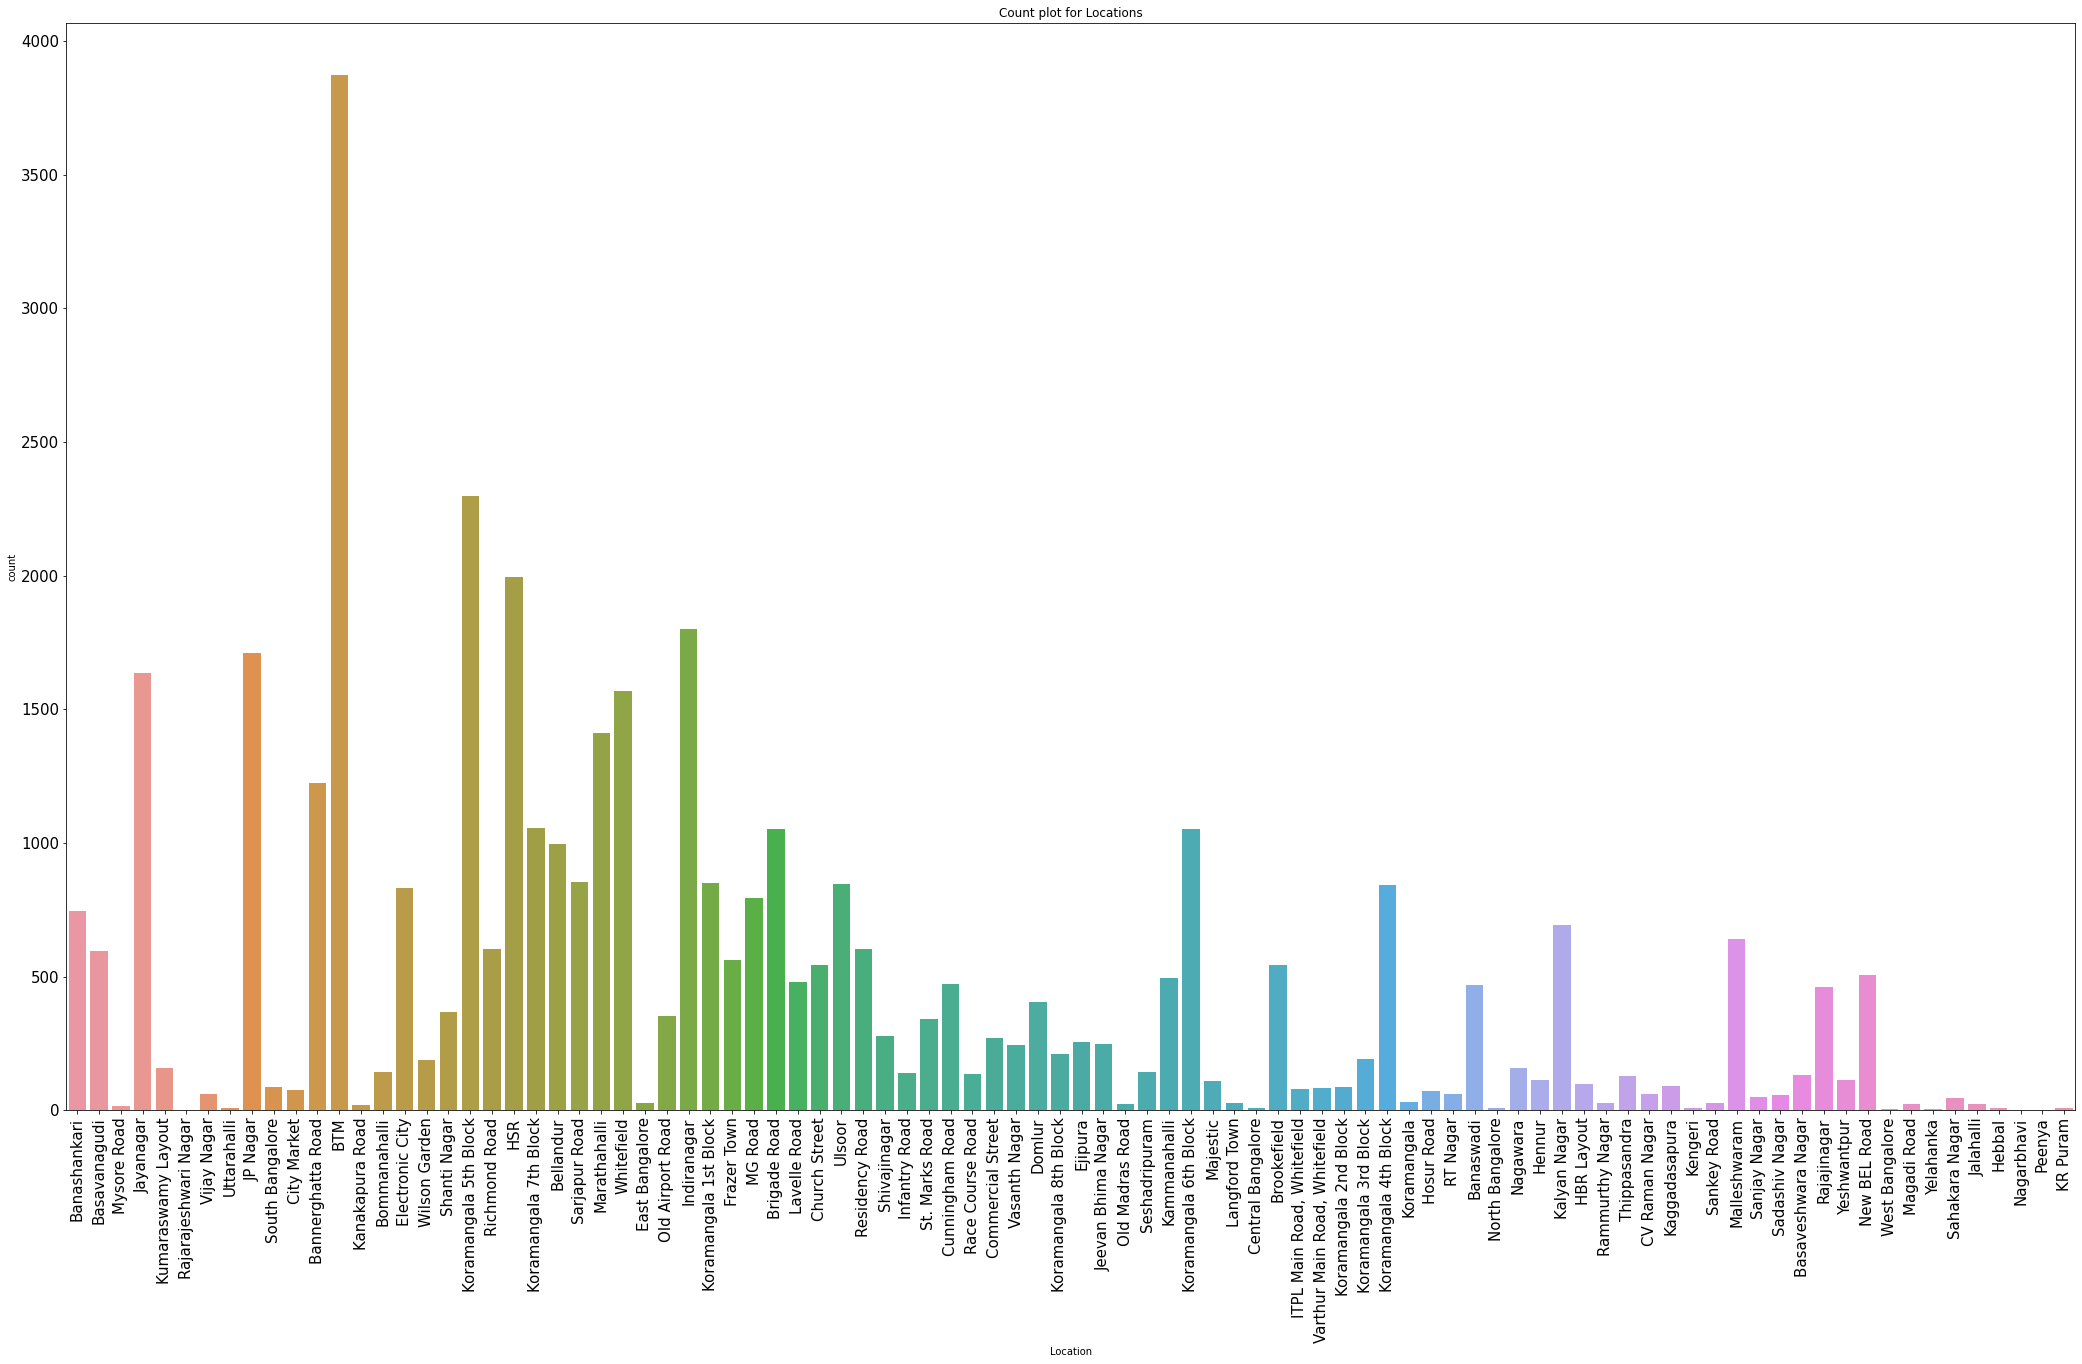

In [ ]:
plt.figure(figsize=(36,20))
plt.title('Count plot for Locations')
ax=sns.countplot(zomato['Location'])
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In this count plot we can see maximum number of restaurants are present in BTM location. So from this we come to point that we want to open a restaurant we will choose location having less number of restaurants like Old Madras Road or Langford Town or Uttarahali,etc. 

#### Q2. Restaurants delivering Online or not

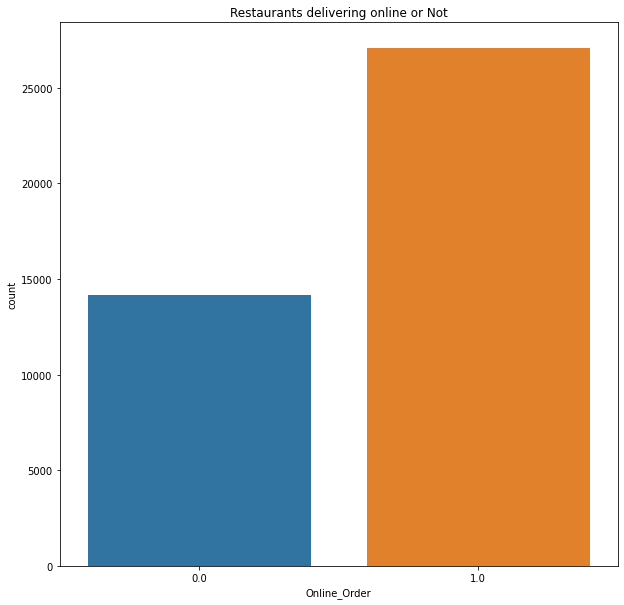

In [ ]:
#Restaurants delivering Online or not
sns.countplot(zomato['Online_Order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')
plt.show()

We can see here that there are more number of restaurants that provide Delivery on Online Order.

#### Q3. Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

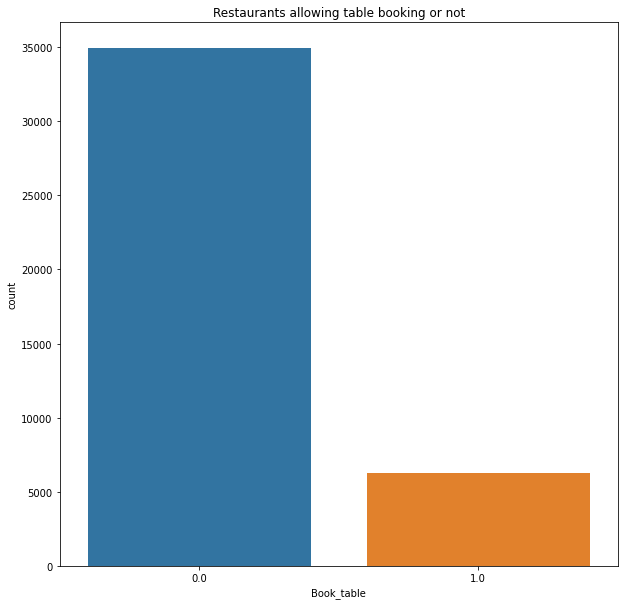

In [ ]:
sns.countplot(zomato['Book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

According to this graph, we can see there are less reataurants that provide online table booking.

#### Q4. Visualizing Online Order Vs. Rating

In [ ]:
zomato['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: Rating, Length: 41233, dtype: float64

In [ ]:
zomato['Online_Order']

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
51709    0.0
51711    0.0
51712    0.0
51715    0.0
51716    0.0
Name: Online_Order, Length: 41233, dtype: float64

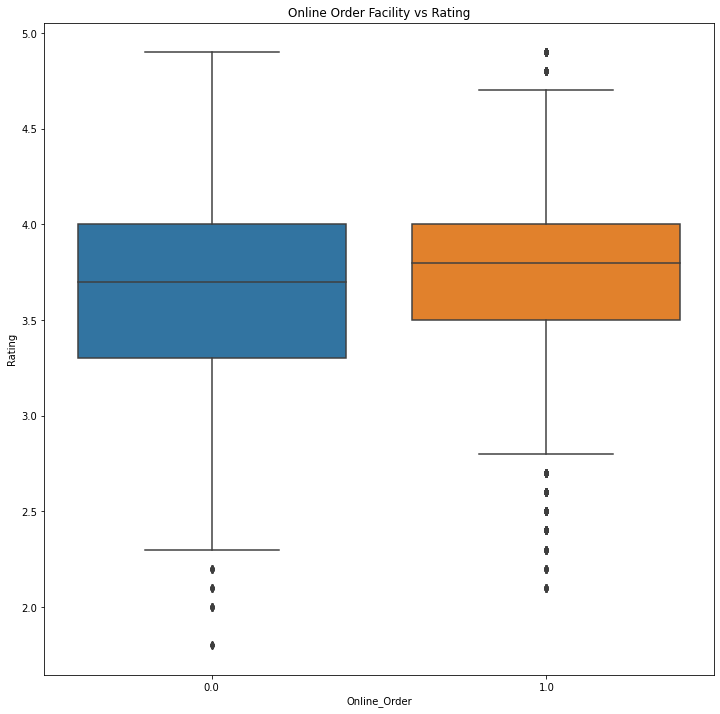

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Online Order Facility vs Rating')
sns.boxplot(x = 'Online_Order', y= 'Rating',data=zomato)
plt.show()

Here, we can analyze that the restaurants that are having online order facility ,their rating is lower than the restaurants that are not having online order facility. Maximum rating for restaurants with online order facility is 4.7 and that for not having facility is 4.9

#### Q5. Table booking vs Rating

In [ ]:
zomato['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: Rating, Length: 41233, dtype: float64

In [ ]:
zomato['Book_table']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
51709    0.0
51711    0.0
51712    0.0
51715    1.0
51716    0.0
Name: Book_table, Length: 41233, dtype: float64

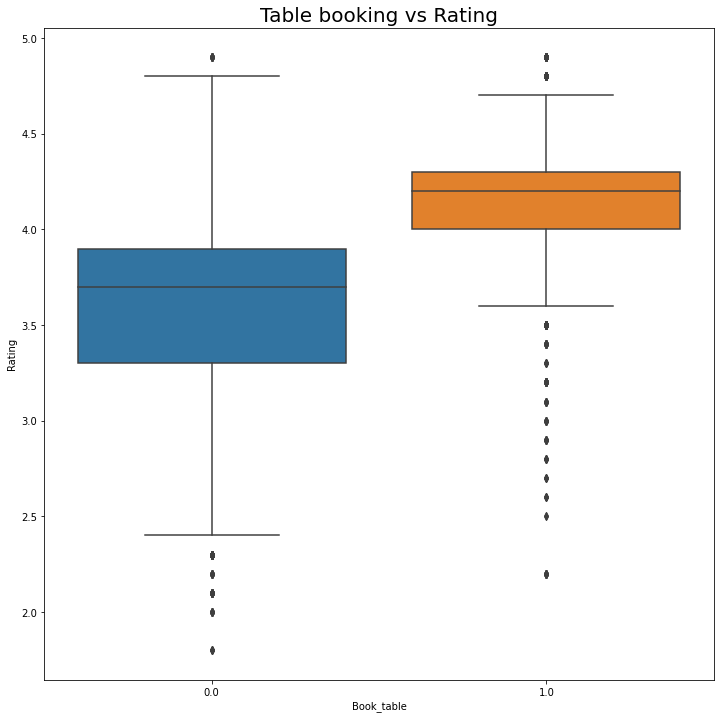

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Table booking vs Rating', fontweight = 30, fontsize = 20)
sns.boxplot(x='Book_table',y= 'Rating',data=zomato)
plt.show()

(1.0=Yes,0.0=No)
Restaurants having book table facility, their average rating is lower than that who are not having the facility.

#### Q6. Visualizing Online Order Facility, Location Wise

In [ ]:
zomato['Online_Order']

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
51709    0.0
51711    0.0
51712    0.0
51715    0.0
51716    0.0
Name: Online_Order, Length: 41233, dtype: float64

In [ ]:
zomato['Location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: Location, Length: 41233, dtype: object

In [ ]:
zomato1 = zomato.groupby(['Location','Online_Order'])['Restaurant_Name'].count()      #grouping data location wise at name
zomato1.to_csv('Location_Online.csv')                                      #storing it at some file
zomato1 = pd.read_csv('Location_Online.csv')
zomato1 = pd.pivot_table(zomato1, index = ['Location'],columns=['Online_Order'])    
zomato1    

Restaurant_Name        
Online_Order                  0.0     1.0
Location                                 
BTM                        1016.0  2857.0
Banashankari                273.0   471.0
Banaswadi                   171.0   297.0
Bannerghatta Road           398.0   828.0
Basavanagudi                183.0   412.0
...                           ...     ...
West Bangalore                1.0     2.0
Whitefield                  612.0   956.0
Wilson Garden                64.0   123.0
Yelahanka                     NaN     4.0
Yeshwantpur                  21.0    91.0

[92 rows x 2 columns]

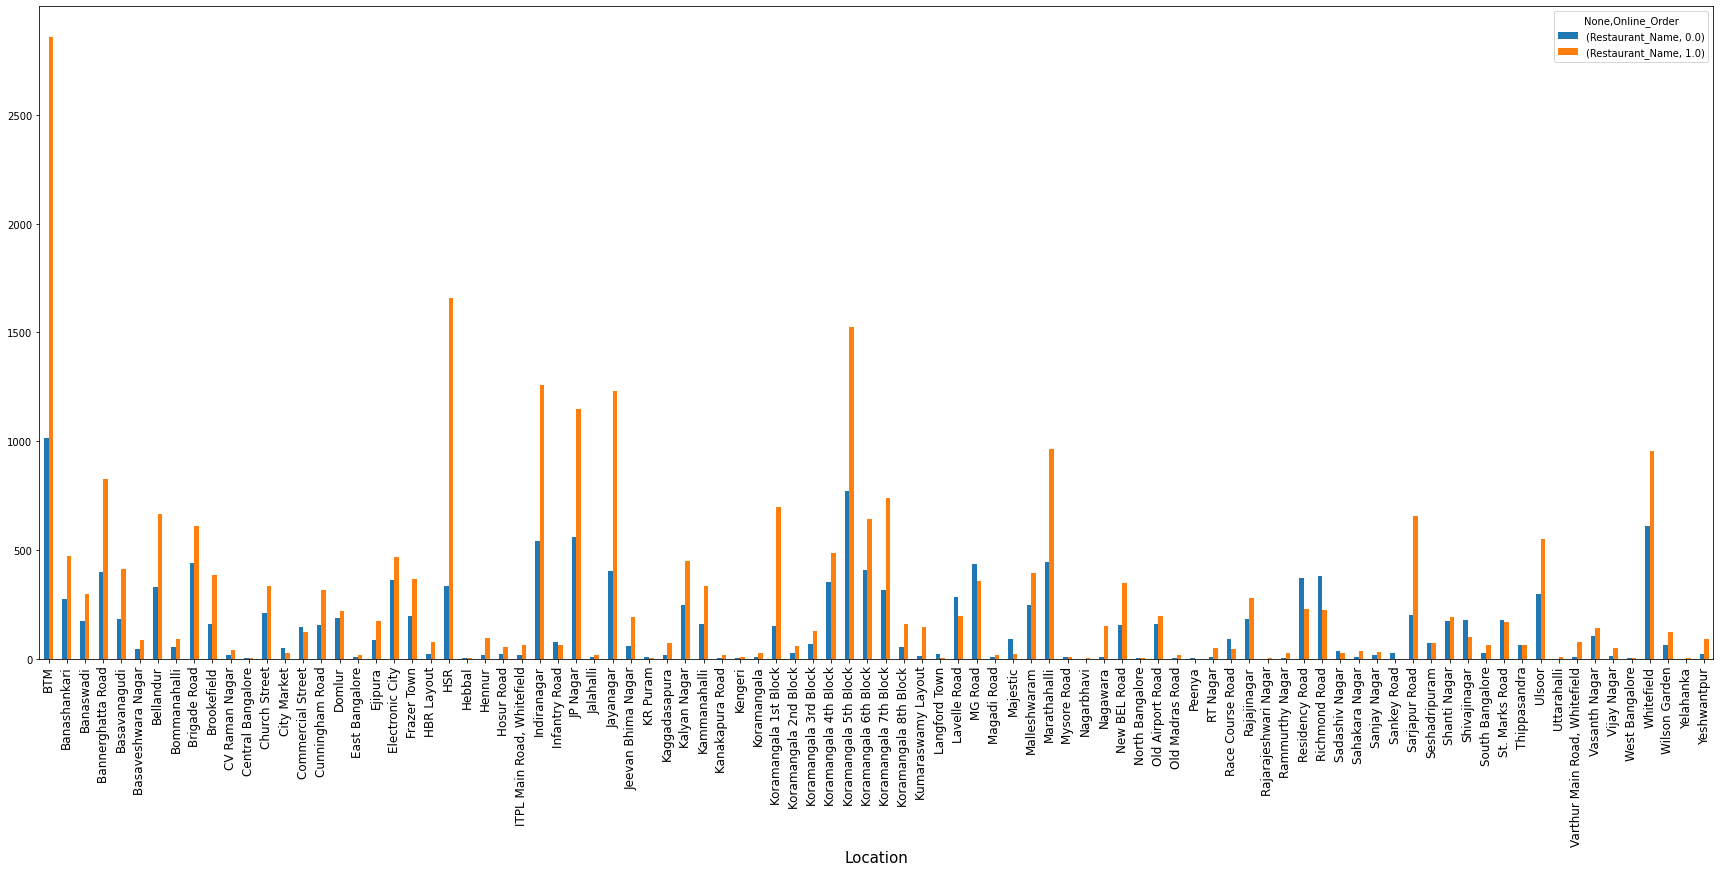

In [ ]:
zomato1.plot(kind = 'bar', figsize=(30,12))
plt.xticks(fontsize=12)
plt.xlabel('Location',fontsize=15)
plt.show()

(orange=yes,blue=no)
In BTM orange line is highest i.e. there are many restaurants that provide online facility. But, in Location like Kanakapura Road or Mysore Road,etc. the blue line is smaller.

#### Q7. Visualizing Book Table Facility, Location Wise

In [ ]:
zomato['Book_table']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
51709    0.0
51711    0.0
51712    0.0
51715    1.0
51716    0.0
Name: Book_table, Length: 41233, dtype: float64

In [ ]:
zomato['Location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: Location, Length: 41233, dtype: object

In [ ]:
zomato2 = zomato.groupby(['Location','Book_table'])['Restaurant_Name'].count()
zomato2.to_csv("Location_booktable.csv")
zomato2 = pd.read_csv('Location_booktable.csv')
zomato2 = pd.pivot_table(zomato2, index=['Location'], columns=["Book_table"], aggfunc=np.sum)
zomato2

Restaurant_Name       
Book_table                    0.0    1.0
Location                                
BTM                        3719.0  154.0
Banashankari                691.0   53.0
Banaswadi                   460.0    8.0
Bannerghatta Road          1128.0   98.0
Basavanagudi                579.0   16.0
...                           ...    ...
West Bangalore                3.0    NaN
Whitefield                 1316.0  252.0
Wilson Garden               182.0    5.0
Yelahanka                     4.0    NaN
Yeshwantpur                 110.0    2.0

[92 rows x 2 columns]

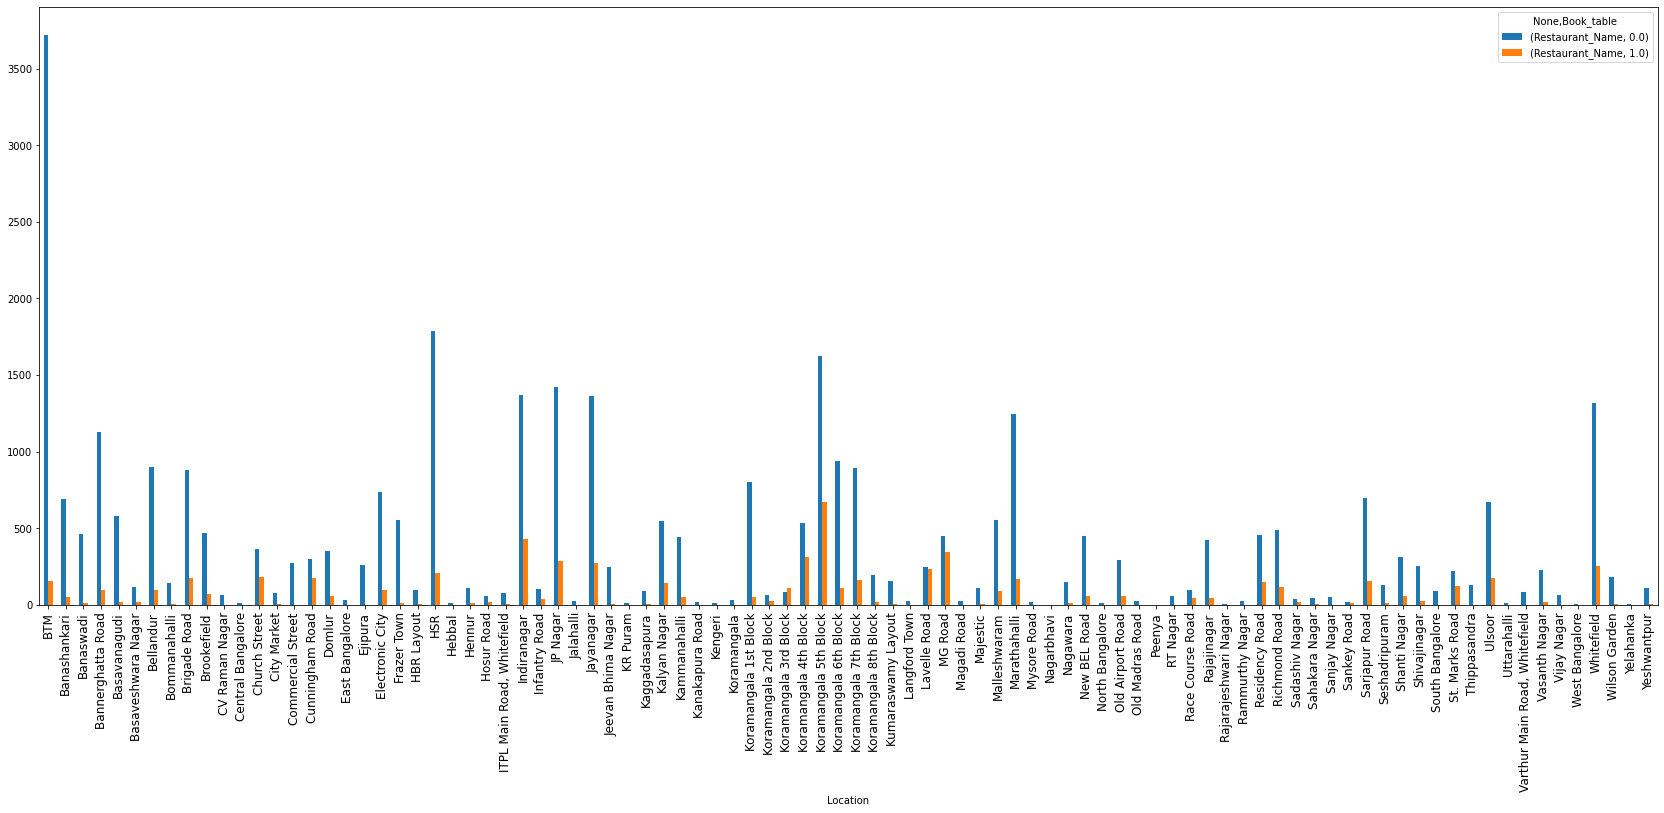

In [ ]:
zomato2.plot(kind='bar',figsize=(29,11))
plt.xticks(fontsize=12)
plt.show()

According to this barplot, we can see in BTM many restaurants are those who do not provide book table, so if someone want to open restaurant he can open in BTM with book table facility. But, BTM already have more restaurants so he can try opening in HSR where there are less restaurants so business may grow.

#### Q8. Visualizing Top Cuisines

In [ ]:
zomato5 = zomato[['Cuisine','Votes']]
zomato5.drop_duplicates()
zomato6 = zomato5.groupby(['Cuisine'])['Votes'].sum()
zomato6 = zomato6.to_frame()        #converting to dateframe
zomato6 = zomato6.sort_values('Votes',ascending=False)
zomato6.head()

,Votes
Cuisine,
Indian North,516306
Cafe Italian Pizza,354037
American Burger Cafe Steak,301059
Chinese Indian North,283265
Chinese Continental Indian North,255202


In [ ]:
zomato6 = zomato6.iloc[:10,:]     #seeing the top 10 entries
zomato6.head()

,Votes
Cuisine,
Indian North,516306
Cafe Italian Pizza,354037
American Burger Cafe Steak,301059
Chinese Indian North,283265
Chinese Continental Indian North,255202


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

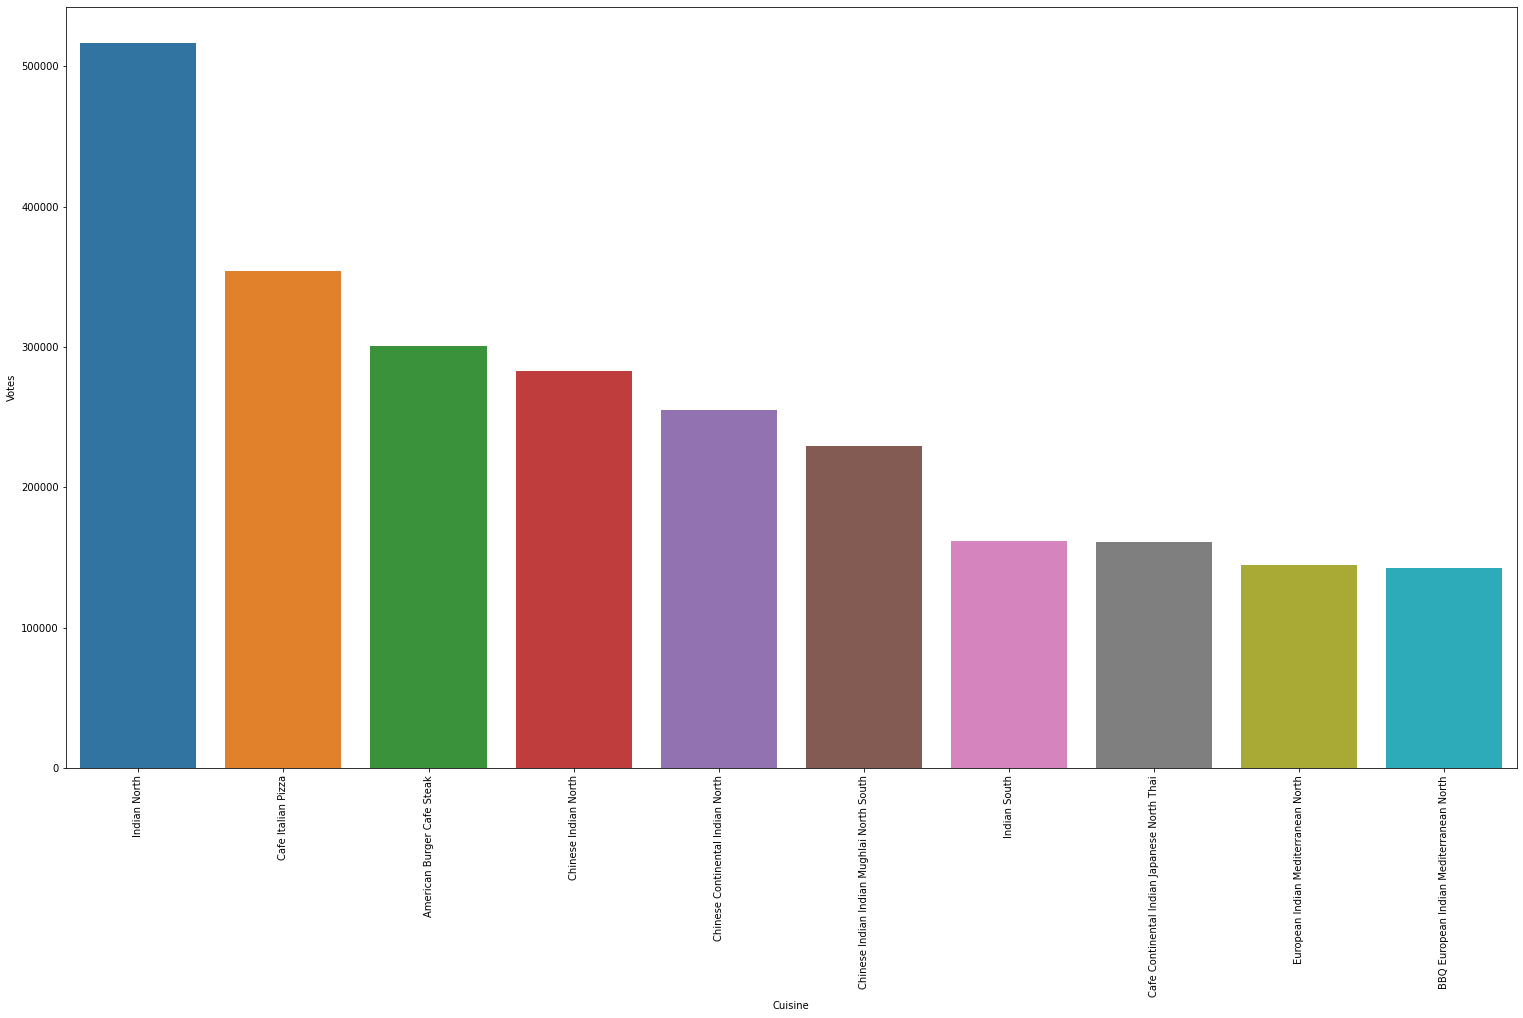

In [ ]:

plt.figure(figsize=(26,14))
sns.barplot(zomato6.index, zomato6['Votes'])
plt.xticks(rotation=90)

Here, we can see North Indian Cuisine is rated highly followed by Cafe Italian Pizza and then American Burger Cafe Steak.

#### Q9. Type of Meal and Rating

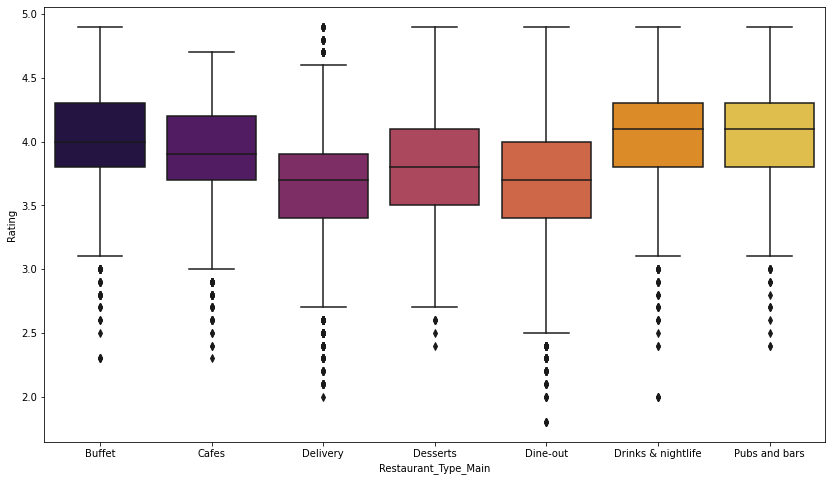

In [ ]:

plt.figure(figsize=(14,8))
sns.boxplot(x = 'Restaurant_Type_Main', y = 'Rating', data = zomato, palette='inferno')

We can see that maximum average rating is given to Buffet type of meal. This type of restaurant are gievn maximum rating. That means, peolpe are coming in this type of restaurant and have rated highest. And also the Delivery type of restaurant is having lowest average rating.

#### Q10. Most famous Restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

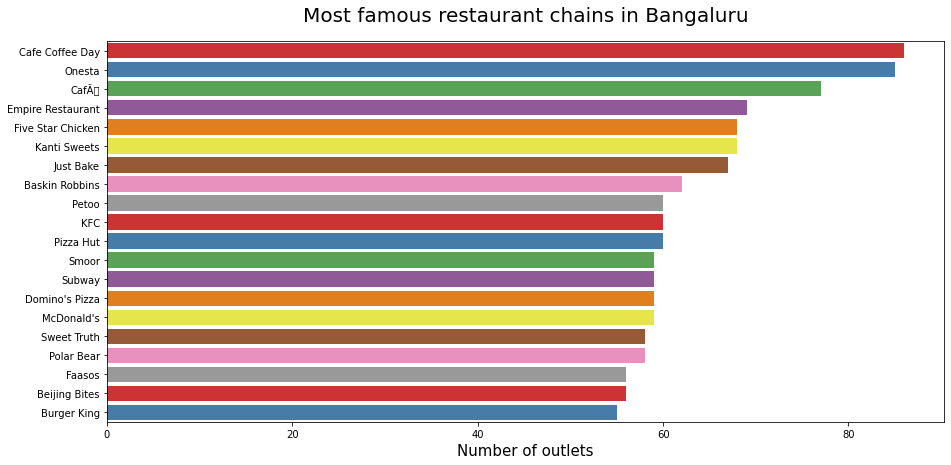

In [ ]:
plt.figure(figsize=(15,7))
chains=zomato['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)


In Bangalore, most famous restaurant chain is CCD (Cafe Coffee Day). 

# CONCLUSION


After all the data processing and  analysis, we can get this following conclusion: There are 51717 restaurants registered on Zomato Apps based in Bangalore. More than 3500 restaurants are located in BTM which is highest amongst the all in Bangalore. There are high number of restaurants that provide Online Order facility comparatively there are less number of restaurants that provide booking table facility. Also North Indian is the cuisine most famous in Bangalore. Restaurants which provide Buffet system are high rated . If we look for most famous restaurant chain in Bangalore, Cafe Coffee Day (CCD) stands at the top.